In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk


In [2]:
df = pd.read_csv('MBTI 500.csv')
df['type'].value_counts()

INTP    24961
INTJ    22427
INFJ    14963
INFP    12134
ENTP    11725
ENFP     6167
ISTP     3424
ENTJ     2955
ESTP     1986
ENFJ     1534
ISTJ     1243
ISFP      875
ISFJ      650
ESTJ      482
ESFP      360
ESFJ      181
Name: type, dtype: int64

In [16]:
example = df['posts'][50]
#example

In [23]:
df['type'][9999]

'INTJ'

In [10]:
nltk.download([
     "names",
     "stopwords",
     "state_union",
     "twitter_samples",
     "movie_reviews",
     "averaged_perceptron_tagger",
     "vader_lexicon",
     "punkt",
 ])


[nltk_data] Downloading package names to
[nltk_data]     C:\Users\css\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\css\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\css\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\css\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\css\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\css\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_d

True

In [4]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['useful',
 'help',
 'treat',
 'root',
 'problem',
 'empathy',
 'help',
 'lot',
 'people',
 'never']

In [5]:
# Parts of speech tagging
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('useful', 'JJ'),
 ('help', 'NN'),
 ('treat', 'VB'),
 ('root', 'NN'),
 ('problem', 'NN'),
 ('empathy', 'NN'),
 ('help', 'NN'),
 ('lot', 'NN'),
 ('people', 'NNS'),
 ('never', 'RB')]

In [6]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('svgling')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\css\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\css\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Error loading svgling: Package 'svgling' not found in
[nltk_data]     index


False

In [7]:
entities = nltk.chunk.ne_chunk(tagged)
entities

In [8]:
# VADER Sentiment Scoring
# Doesnt account for relationships between words

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()


In [16]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [17]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [12]:
sia.polarity_scores('I don\'t like to draw attention to myself')

{'neg': 0.26, 'neu': 0.74, 'pos': 0.0, 'compound': -0.2755}

In [14]:
sia.polarity_scores(example)

{'neg': 0.163, 'neu': 0.557, 'pos': 0.28, 'compound': 0.9974}

In [23]:
df['Id'] = range(1, len(df)+1)

In [24]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['posts']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/106067 [00:00<?, ?it/s]

In [30]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [2]:
vaders['type'].value_counts()

NameError: name 'vaders' is not defined

In [1]:
vaders.head()

NameError: name 'vaders' is not defined

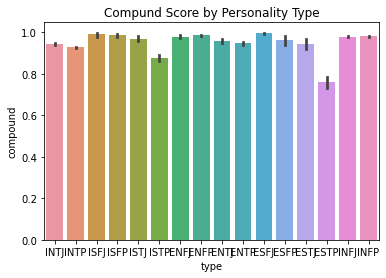

In [ ]:
ax = sns.barplot(data=vaders, x='type', y='compound')
ax.set_title('Compund Score by Personality Type')
plt.show()

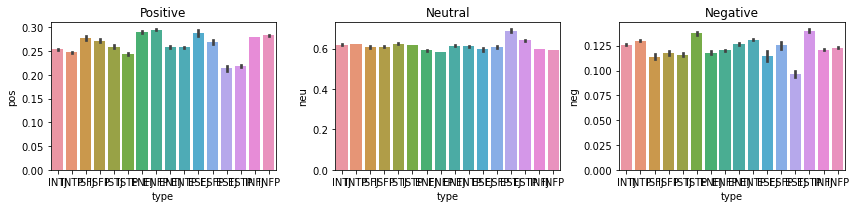

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='type', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='type', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='type', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
print(example)
sia.polarity_scores(example)

useful help treat root problem empathy help lot people never mean ill towards someone else action usually interpret differently others intend try weightlift yet want great outlet try know people similar experience change pretty deeply start lift big compound lift break stuff like curl weight machine actually want give try want info let know get teary quite often remember buffy die time particularly eye moisten mean peer pressure e grow mostly white high class neighborhood probably win end big rap hip hop fan course find exception shit example get point absolutely idea find poem book high school kind poetry read competition stick say dobby free ex break usually awkward pat friend back tell weird motivational speech react people inform brother go father horrify inform twin friend ruin summer vacation come apologize month late finish apology want say ok say amen oral exam spiral downwards much end tell teacher like class yeh guess low fier go say unless spare enough time think mostly awkw

{'neg': 0.078, 'neu': 0.656, 'pos': 0.266, 'compound': 0.9987}

In [ ]:
encoded_text = tokenizer(example[:2500], return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.25239226, 'roberta_neu': 0.6838807, 'roberta_pos': 0.06372705}


In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['posts']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text[:2500])
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/106067 [00:00<?, ?it/s]

Broke for id 514
Broke for id 2660
Broke for id 2883
Broke for id 3046
Broke for id 3302
Broke for id 4380
Broke for id 4952
Broke for id 5022


KeyboardInterrupt: 

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()